#ABSTRACT
This dataset is valuable for analyses like trend spotting in movie genres, understanding the relationship between movie budgets and box office success, evaluating the influence of actors on movie ratings, and assessing the critical reception of movies across different regions and years.

individual data consists of various data entries including both numerical and categorical data.


In [27]:
!pip3 install h2o

In [28]:
import h2o
from h2o.automl import H2OAutoML

#Initializing the H20 Cluster

In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 mins 44 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_kyyk8l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Now we will load the dataset in H2o dataframe


In [30]:
df = h2o.import_file('https://raw.githubusercontent.com/ADUSUMILLIJ/Data-Sci-Engineering-Methods/main/Movieratings.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Describing the dataset with basic statistics

In [31]:
df.describe(chunk_summary=True)


Rows:100
Cols:15

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size    size_percentage
------------  -------------------------  -------  ------------------  ------  -----------------
C1N           1-Byte Integers (w/o NAs)  9        60                  1.5 KB  22.7539
C1S           1-Byte Fractions           2        13.3333             368  B  5.538
C2S           2-Byte Fractions           1        6.66667             284  B  4.27389
C4            4-Byte Integers            1        6.66667             468  B  7.04289
CStr          Strings                    2        13.3333             3.9 KB  60.3913

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  6.5 KB  100               1                              15
mean             6.5 KB  100               1                              15
min              6.5 KB  100               1                              15
max              6.5 KB  100               1                              15
stddev           0  B    0                 0                              0
total            6.5 KB  100               1                              15

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,content_rating,Country
type,string,int,int,int,enum,enum,string,real,enum,enum,enum,int,int,enum,enum
mins,NaN,2010.0,3000000.0,223838.0,,,NaN,7.5,,,,62.0,91.0,,
mean,NaN,2012.8200000000004,78384000.0,146867867.23999998,,,NaN,7.883000000000001,,,,78.64000000000003,126.42000000000003,,
maxs,NaN,2016.0,260000000.0,936662225.0,,,NaN,8.8,,,,100.0,180.0,,
sigma,NaN,1.919490673185086,74452947.27259466,145400370.1299839,,,NaN,0.24743328863197106,,,,9.0492702981673,19.050798652364403,,
zeros,0,0,0,0,,,0,0,,,,0,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,La La Land,2016.0,30000000.0,151101803.0,Ryan Gosling,Emma Stone,Amie Conn,8.2,Comedy,Drama,Music,93.0,128.0,PG-13,USA
1,Zootopia,2016.0,150000000.0,341268248.0,Ginnifer Goodwin,Jason Bateman,Idris Elba,8.1,Animation,Adventure,Comedy,78.0,108.0,PG,USA
2,Lion,2016.0,12000000.0,51738905.0,Dev Patel,Nicole Kidman,Rooney Mara,8.1,Biography,Drama,Suspense,69.0,118.0,PG-13,Australia


In [90]:
col_types = df.types
numerical_cols = [col for col, type in col_types.items() if type in ['int', 'real']]
df_numerical = df[numerical_cols]
print(df_numerical)

  title_year    budget        Gross    IMDb_rating    MetaCritic    Runtime
        2016  3e+07     1.51102e+08            8.2            93        128
        2016  1.5e+08   3.41268e+08            8.1            78        108
        2016  1.2e+07   5.17389e+07            8.1            69        118
        2016  4.7e+07   1.00546e+08            8              81        116
        2016  9e+06     4.76954e+07            7.9            96        137
        2016  1.2e+07   2.70078e+07            7.7            88        102
        2016  1.65e+08  2.32642e+08            7.6            72        115
        2010  2.6e+08   2.00807e+08            7.8            71        124
        2012  2.5e+08   4.48131e+08            8.4            78        164
        2016  2.5e+08   4.07197e+08            7.9            75        147
[100 rows x 6 columns]



Now lets Split the data into training set and test set

In [72]:
train, test = df_numerical.split_frame(ratios=[0.8], seed = 1)

Providing some parameters inorder to train the data

In [73]:
aml = H2OAutoML(max_models =40,
                balance_classes=True,
		seed =1)

In [74]:
aml.train(training_frame = train, y = 'Gross')

AutoML progress: |
17:07:51.111: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 85.0.

███████
17:07:55.433: DeepLearning_1_AutoML_14_20240219_170749 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_14_20240219_170749_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_14_20240219_170749_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          6095                   4            4            4             5             10            7.76923

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2820534143691638.5
RMSE: 53108701.20509104
MAE: 33070544.564705882
RMSLE: 0.8520183072868658
Mean Residual Deviance: 2820534143691638.5

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1.0136387466113416e+16
RMSE: 100679627.86042376
MAE: 69809018.22011515
RMSLE: 1.1544738900446916
Mean Residual Deviance: 1.0136387466113416e+16

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     7.15248e+07  1.20795e+07  5.58712e+07   6.96059e+07   8.40841e+07   6.49585e+07   8.31043e+07
mean_residual_deviance  1.07528e+16  7.57627e+15  4.69504e+15   7.17907e+15   2.36015e+16   6.92314e+15   1.13651e+16
mse                     1.07528e+16  7.57627e+15  4.69504e+15   7.17907e+15   2.36015e+16   6.92314e+15   1.13651e+16
r2                      0.444794     0.191482     0.518752      0.505996      0.521603      0.105269      0.572348
residual_deviance       1.07528e+16  7.57627e+15  4.69504e+15   7.17907e+15   2.36015e+16   6.92314e+15   1.13651e+16
rmse                    9.93381e+07  3.32552e+07  6.85203e+07   8.47294e+07   1.53628e+08   8.32054e+07   1.06607e+08
rmsle                   1.05837      0.507329     0.704291      1.68242       0.736314      0.631847      1.53699

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 17:08:13  0.528 sec   0                  1.4905e+08       1.07516e+08     2.22158e+16
    2024-02-19 17:08:13  0.534 sec   5                  1.12389e+08      7.53291e+07     1.26313e+16
    2024-02-19 17:08:13  0.539 sec   10                 8.9694e+07       5.96582e+07     8.04501e+15
    2024-02-19 17:08:13  0.543 sec   15                 7.73306e+07      5.04263e+07     5.98002e+15
    2024-02-19 17:08:13  0.548 sec   20                 6.85654e+07      4.40806e+07     4.70122e+15
    2024-02-19 17:08:13  0.553 sec   25                 6.48612e+07      4.02879e+07     4.20698e+15
    2024-02-19 17:08:13  0.558 sec   30                 6.09191e+07      3.74073e+07     3.71114e+15
    2024-02-19 17:08:13  0.563 sec   35                 5.57868e+07      3.46064e+07     3.11217e+15
    2024-02-19 17:08:13  0.567 sec   39                 5.31087e+07      3.30705e+07     2.82053e+15

Variable Importances: 
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  ------------
budget       6.35899e+18            1                    0.73713
Runtime      1.13019e+18            0.177731             0.131011
IMDb_rating  5.17369e+17            0.0813603            0.0599731
title_year   3.53231e+17            0.0555483            0.0409463
MetaCritic   2.66905e+17            0.0419729            0.0309395

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Now to Evaluate the training we use leaderboard to compare all values and select the more realaible one

In [75]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_14_20240219_170749_model_2,1.0068e+08,1.01364e+16,6.9809e+07,1.15447,1.01364e+16
GBM_grid_1_AutoML_14_20240219_170749_model_19,1.04417e+08,1.0903e+16,6.94116e+07,1.18692,1.0903e+16
XGBoost_grid_1_AutoML_14_20240219_170749_model_3,1.04785e+08,1.09798e+16,7.00612e+07,nan,1.09798e+16
StackedEnsemble_AllModels_1_AutoML_14_20240219_170749,1.05718e+08,1.11763e+16,7.23295e+07,nan,1.11763e+16
XGBoost_grid_1_AutoML_14_20240219_170749_model_2,1.08132e+08,1.16925e+16,7.19644e+07,nan,1.16925e+16
GBM_4_AutoML_14_20240219_170749,1.08419e+08,1.17548e+16,6.85188e+07,1.12888,1.17548e+16
GBM_grid_1_AutoML_14_20240219_170749_model_20,1.08997e+08,1.18803e+16,7.58314e+07,1.21763,1.18803e+16
GBM_3_AutoML_14_20240219_170749,1.09118e+08,1.19067e+16,6.94612e+07,1.1311,1.19067e+16
GBM_grid_1_AutoML_14_20240219_170749_model_30,1.10084e+08,1.21186e+16,7.00759e+07,1.14214,1.21186e+16
XGBoost_grid_1_AutoML_14_20240219_170749_model_7,1.10252e+08,1.21556e+16,7.33122e+07,nan,1.21556e+16


Now taking the top of the leaderboard model as best_model

In [89]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_14_20240219_170749_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          6095                   4            4            4             5             10            7.76923

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2820534143691638.5
RMSE: 53108701.20509104
MAE: 33070544.564705882
RMSLE: 0.8520183072868658
Mean Residual Deviance: 2820534143691638.5

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1.0136387466113416e+16
RMSE: 100679627.86042376
MAE: 69809018.22011515
RMSLE: 1.1544738900446916
Mean Residual Devianc

"GBM_grid_1_AutoML_14_20240219_170749_model_2" is picked as the best model as it has the lowest rsme value from the rest of the models, but we need to cross validate this to get more accurate prediction.


In [88]:
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 6659708854462240.0
RMSE: 81607039.24577977
MAE: 55649667.752291664
RMSLE: 1.492387457797139
Mean Residual Deviance: 6659708854462240.0

To Explain the model using variable importance , partial dependencies, SHAP values and model cor relation with a simple code.

In [93]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,budget,5.181918e+18,1.000000,0.758605
1,IMDb_rating,6.373408e+17,0.122993,0.093303
2,Runtime,5.753891e+17,0.111038,0.084234
3,MetaCritic,2.420203e+17,0.046705,0.035430
4,title_year,1.941803e+17,0.037473,0.028427


<ipython-input-86-a014839e3e69>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})


Text(0.5, 1.0, 'Variable Correlation')

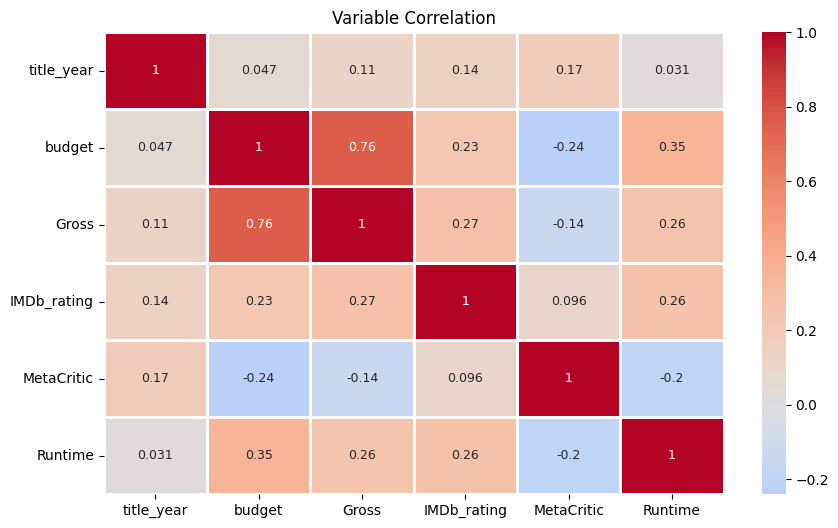

In [86]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dfpd1 = pd.read_csv("https://raw.githubusercontent.com/ADUSUMILLIJ/Data-Sci-Engineering-Methods/main/Movieratings.csv",encoding='latin-1')
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

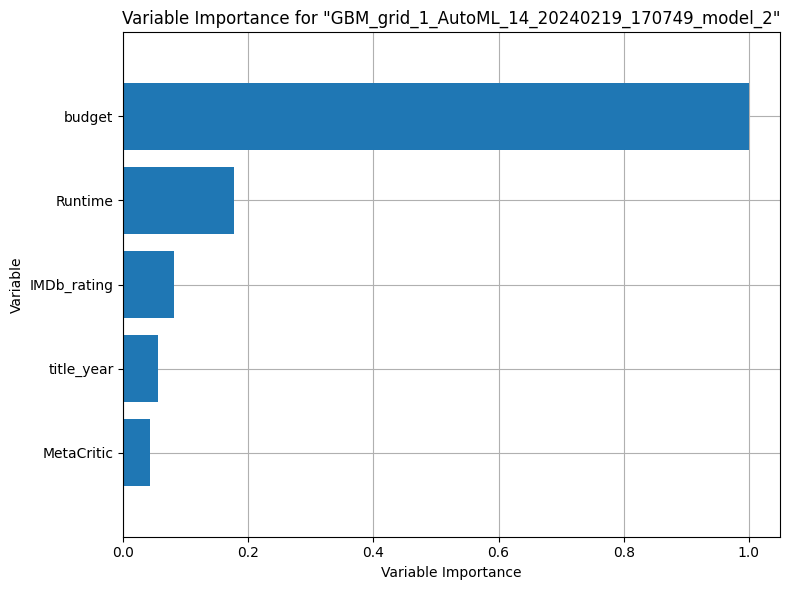

In [78]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


According to the variable importance TO predict "Gross"
Budget has Highest impact on predicting Gross.
IMBD-Rating has second highest impact after Budget inorder to predict Gross.
Content Rating has least impact in predicting BUdget inorder to predict Gross.


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

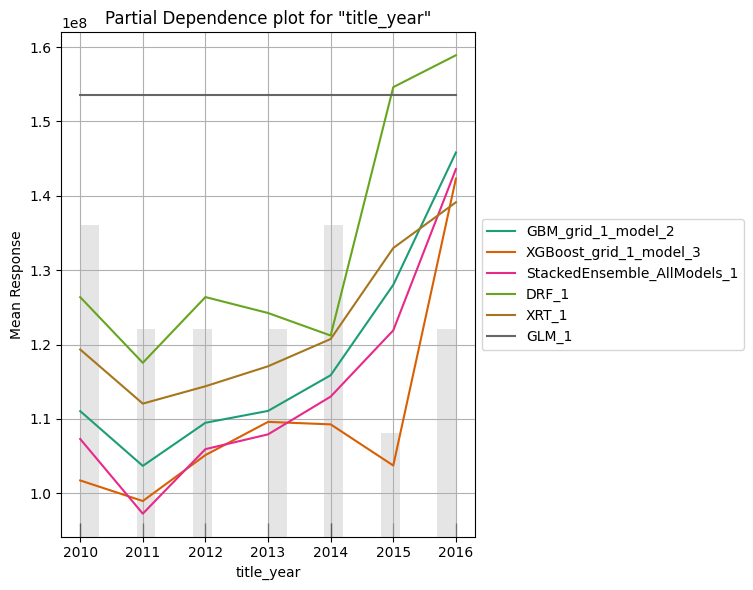

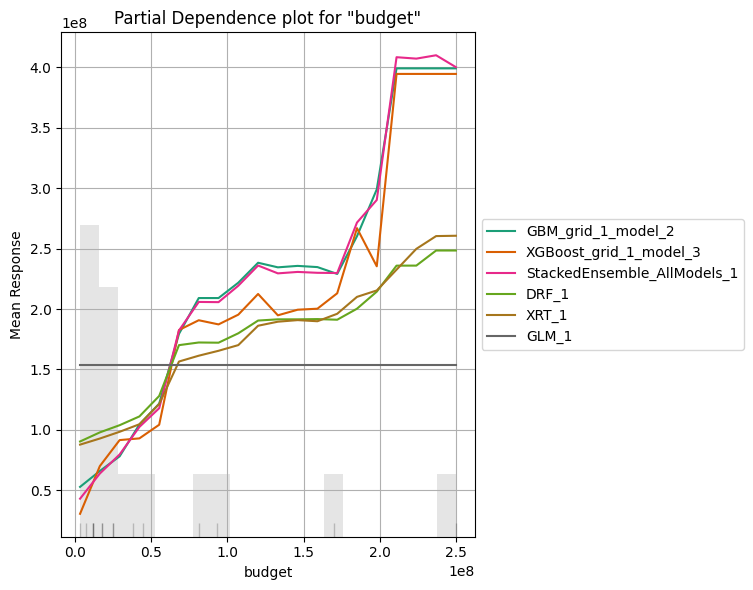

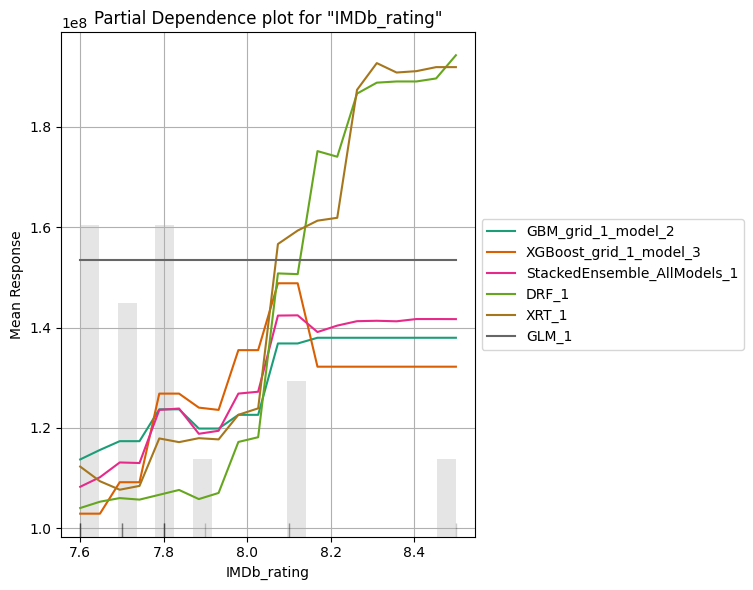

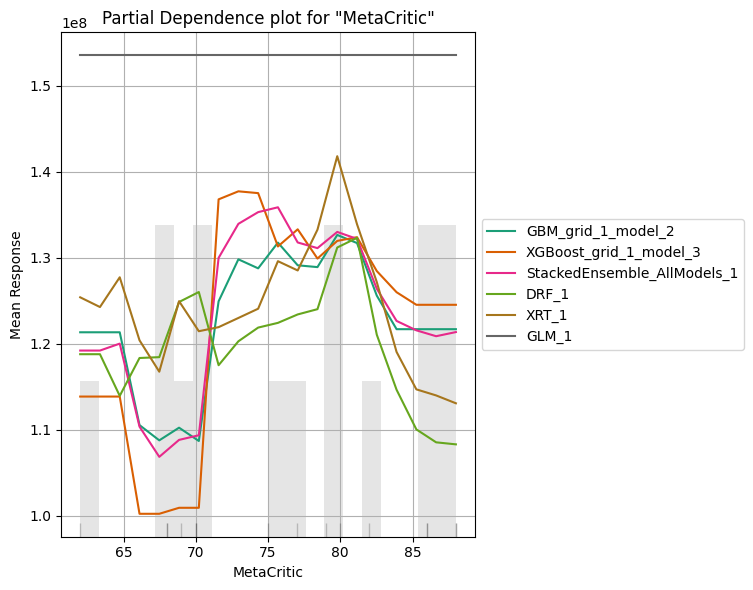

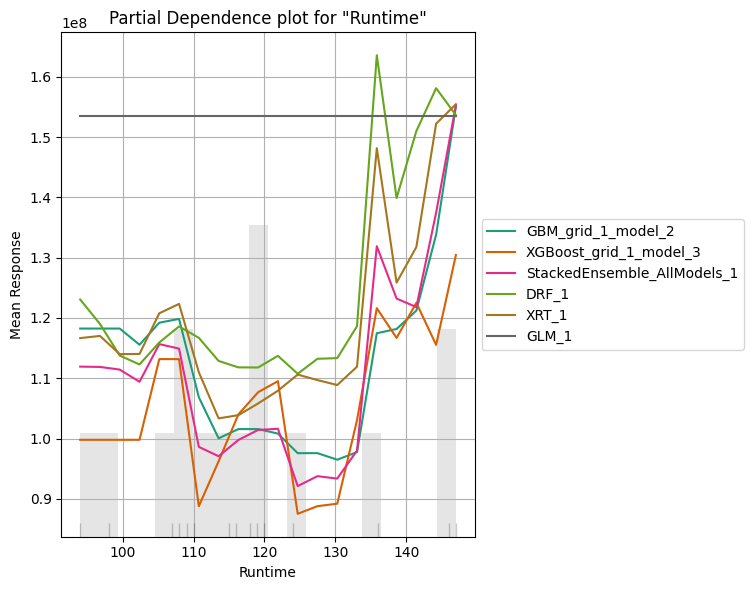

In [79]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

Using a h20 frame we can input explain a individual row.

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

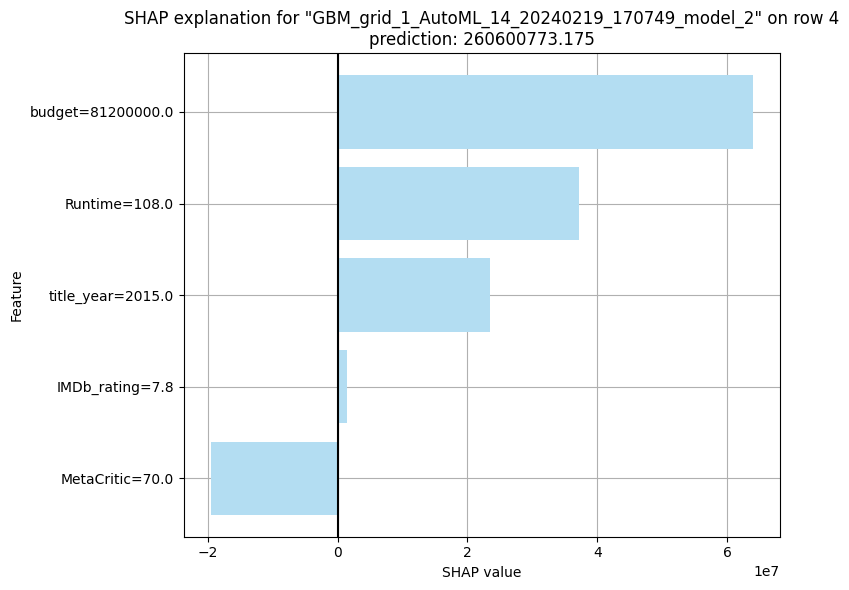

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

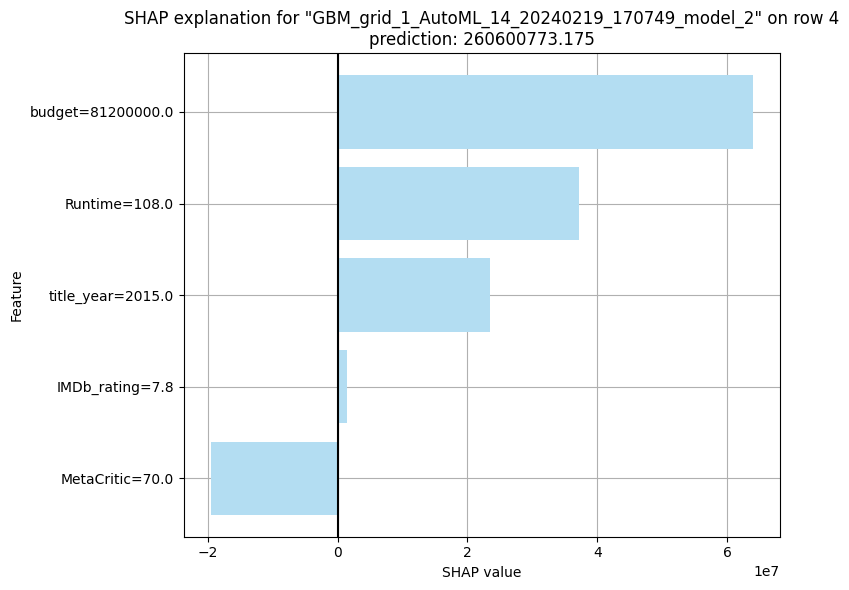

In [80]:
aml.explain_row(frame = test, row_index = 4, figsize = (8,6), exclude_explanations = "leaderboard")


#Question and Answers

-Is the relationship significant?

Ans- Given the above metrics, we can infer that the model is capturing some relationship between the features and the target variable, as evidenced by the R² value. However, the significance of this relationship is moderate, not strong. The high values of MSE, RMSE, and MAE indicate that the model's predictions are often quite far from the actual values.

-Are any model assumptions violated?

Ans- Given the nature of XGBoost, traditional linear model assumptions don't directly apply. However, the high error metrics suggest that the model might not be appropriately capturing the underlying relationship between the features and the target variable.

-Is there any multicollinearity in the model?

Ans- yes from corelation analysis we can make sure that there is multicollinearity

-In the multivariate models are predictor variables independent of all the other predictor variables?

Ans-NO, They are not independent to each other.

-In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Ans- Budget has most significance and meta critic has least significance.

-Does the model make sense?
Ans-No, Rmse is Very High which means prediction is very off

-Which independent variables are significant?
Ans- The Most Significant is Budget

-Which hyperparameters are important?
Ans- All the Hyperparameters are important inorder to compare eachother to find the best one.



#Conclusion
In this assignment, we analyzed a movie dataset using H2O on MovieRatings dataset inorder to predict target variable values using R*2 and RMSE. We achieved a model with mean of the RMSE - 0.95 and mean R*2 value of 0.44, indicating high predictive accuracy. This analysis not only demonstrated the application of advanced machine learning techniques but also set a quantitative benchmark for future explorations in the domain of entertainment analytics.

#Reference:
-Automated Machine Learning with H2O

-H2O AI AutoML

-Kaggle

-Reference Notebooks
https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML

#Licence:

MIT License

Copyright (c) 2024 ADUSUMILLIJ

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.